## **Метрики классификации. Мультиклассовая классификация**

✍ Мы научились обучать модель логистической регрессии, чтобы решать с её помощью задачу классификации. Теперь мы познакомимся с метриками классификации, чтобы научиться оценивать качество модели.

## **МЕТРИКИ КЛАССИФИКАЦИИ**

Будем рассматривать метрики для задачи регрессии на следующем примере. Мы выбрали случайным образом десять пациентов из нашей таблицы и предсказали для них моделью **log_reg_full** ответы:

![](data/f24.PNG)

Все метрики, которые мы рассмотрим, основаны на **матрице ошибок**. С неё мы и начнём наш разбор.

* **Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов.

Назовём класс 1 положительным исходом (positive), а класс 0 — отрицательным исходом (negative).

Тогда матрица ошибок классификации будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/ad62639c37cd7b5191a62665d466d9a8/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_1.1.png)

Для наглядности можно представить предсказания модели следующей схемой:

![](https://lms.skillfactory.ru/assets/courseware/v1/94cbd07457b7d12070580bda830cb820/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_1.png)

Давайте посмотрим, как будет выглядеть матрица ошибок для нашего примера предсказаний модели log_reg_full:

![](data/f25.PNG)

Примечание. Нередко в русской литературе вы можете встретить перевод метрики ***accuracy*** как «точность», однако так же на русский язык переводится метрика ***precision***, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.
***
На основе матрицы ошибок составляются следующие метрики классификации:

* **Accuracy** (достоверность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):

![](data/f26.PNG)

**Интерпретация: как много (в долях) модель угадала ответов.**

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:

![](data/f27.PNG)

Итак, наша accuracy равна 0.5, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она **бесполезна, если классы сильно несбалансированы (то есть в каждом из классов сильно отличается количество примеров)**.

                                                            ПРИМЕР:

Допустим, мы хотим оценить работу спам-фильтра почты. Спам-письма обозначены как Positive (1), а не-спам-письма — как Negative (0).

У нас есть 100 не-спам-писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).

Тогда accuracy:

![](data/f28.PNG)

Однако представим, что мы просто будем предсказывать все письма как не спам, то есть True Positive = 100, True Negative = 0, False Positive = 10, False Negative = 0.

Тогда accuracy будет равна:

![](data/f29.PNG)

Метрика выросла, однако, наша «модель» не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. 

Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.

                                                        КОНЕЦ ПРИМЕРА.

* **Precision (точность), или PPV (Positive Predictive Value)** — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

![](data/f30.PNG)

![](https://lms.skillfactory.ru/assets/courseware/v1/a15e1d1500cfd5e4319c917296fc7f6e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_3.png)

Метрика также изменяется от 0 до 1. 

**Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий.**

Именно precision не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение False Positive и метрика снижается.

Рассчитаем precision для нашего примера:

![](data/f31.PNG)

Таким образом, количество названных моделью больных диабетом и при этом действительно являющихся больными составляет 67 % от всех пациентов.

*Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.*

Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции для урегулирования конфликта. Однако штат сотрудников сильно ограничен, реагировать на любой признак конфликта мы не можем, поэтому мы хотим уменьшить количество ложных вызовов. В такой ситуации мы выберем такую модель, у которой наибольший precision.

В предельном случае (когда precision равен 1) у модели отсутствуют ложные срабатывания.

* **Recall (полнота), или TPR (True Positive Rate)** — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

![](data/f32.PNG)

![](https://lms.skillfactory.ru/assets/courseware/v1/ed1d458c8986f42fefee817eeea7c975/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_4.png)

**Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall.** 

Рассчитаем **recall** для нашего примера:

![](data/f33.PNG)

Итак, процент пациентов, которых модель определила к классу больных диабетом, среди всех действительно больных диабетом составляет 57 %.

*Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.*

Например, это различные диагностические задачи с серьёзными заболеваниями. В таких задачах последствия будут негативнее, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

Предельный случай (когда recall равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, с какой точностью мы это сделали.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что **увеличение одной из метрик может привести к уменьшению другой.**

Концентрация только на одной метрике (precision или recall) без учёта второй — сомнительная идея.

В битве за максимум precision для класса 1 побеждает модель, которая всегда будет говорить говорить «нет». У неё вообще не будет ложных срабатываний.

В битве за максимум recall для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1. 

**В реальности необходимо балансировать между двумя этими метриками.**

Классическим примером является задача определения оттока клиентов.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью.

В таком случае нам подойдёт следующая метрика.

* **Fβ (F-мера) — это взвешенное среднее гармоническое между precision и recall:**

![](data/f34.PNG)

где ***β*** — это **вес** precision в метрике: чем больше ***β***, тем больше вклад.

В частном случае, когда β = 1, мы получаем равный вклад для precision и recall, а формула будет выражать простое среднее гармоническое, или метрику F1 (F1-мера):

![](data/f35.PNG)

Рассчитаем метрику F1 для нашего примера:

![](data/f36.PNG)

В чём преимущество F1-меры?

Метрика равна своему максимуму (1), если и precision, и recall равны 1. Но *если хотя бы одна из метрик будет близка к 0, то и F1 будет близка к 0*. 

Несмотря на отсутствие бизнес-интерпретации, метрика F1 является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов.

### **ТАБЛИЦА-обобщение**

![](data/f37.PNG)

***
## **РАСЧЁТ МЕТРИК НА PYTHON**

Теперь давайте посмотрим, как можно произвести расчёт метрик на Python.

Весь набор функций для вычисления метрик в **sklearn** находится в модуле **metrics**. Давайте его импортируем:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

# для логистической регрессии
from sklearn import linear_model #линейные модели
# сам модуль метрикс
from sklearn import metrics

In [3]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [4]:
# код из предыдущего юнита

#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)

#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)



Функции, которые нам понадобятся:

* **confusion_matrix()** — расчёт матрицы ошибок,
* **accuracy_score()** — расчёт accuracy,
* **precision_score()** — расчёт precision,
* **recall_score()** — расчёт recall,
* **f1_score()** — расчёт -меры.

Каждая из этих функций первым аргументом принимает предсказанные значения целевой переменной y^, а вторым аргументом — истинные ответы y.
***
Давайте составим матрицы ошибок для моделей log_reg_2d и log_reg_full, которые мы обучили в прошлом юните.

Для этого сделаем предсказание наличия диабета для всех пациентов с помощью каждой из моделей:

In [5]:
#Делаем предсказание моделью, обученной на двух факторах 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех факторах 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

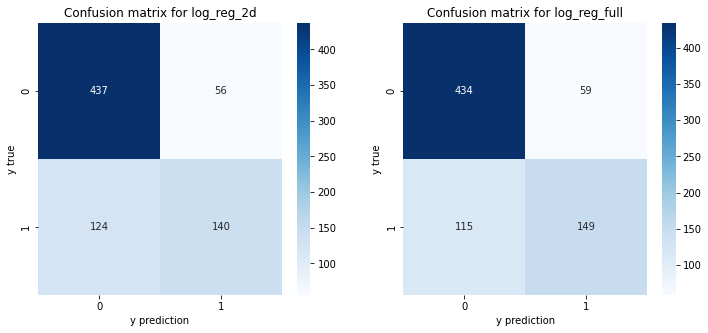

In [6]:
# Построим матрицы ошибок для каждой модели, а затем отобразим их в виде тепловых карт:

#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

Видно, что матрицы ошибок незначительно отличаются по своим составляющим. На их основе можно вручную вычислить остальные метрики для каждой из моделей, но мы воспользуемся встроенными функциями.

In [7]:
# Расчёт метрик для модели log_reg_2d, обученной на двух факторах — Glucose и BMI:

#Модель log_reg_2d:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


In [8]:
# Расчёт метрик для модели log_reg_full, обученной на всех доступных факторах:

#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


А теперь давайте сравним:

* Accuracy: доля правильных ответов для первой модели составляет 0.76, для второй — 0.77.
* Precision: способность первой модели отделять больных диабетом пациентов от здоровых пациентов составляет 0.71, а второй — 0.72.
* Recall: обобщающая способность находить больных пациентов среди всех пациентов для первой модели — 0.53, а для второй — 0.56.
* F1: среднее гармоническое между precision и recall для первой модели составляет 0.61, а для второй — 0.63.
  
Видно, что хоть и с небольшим отрывом, но вторая модель, обученная по всем признакам, превосходит первую модель по всем метрикам.

Видно, что хоть и с небольшим отрывом, но вторая модель, обученная по всем признакам, превосходит первую модель по всем метрикам.

Для облегчения расчёта метрик можно использовать функцию **classification_report()** из модуля **metrics**. Она возвращает отчёт обо всех метриках классификации:

In [9]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



**Что здесь отображено?**

1. В первой части таблицы отображаются метрики precision, recall и f1-score, рассчитанные для каждого класса в отдельности. Столбец support — это количество объектов каждого из классов.
2. Во второй части таблицы отображена общая метрика accuracy. 
3. Далее идёт строка macro avg — это среднее значение метрики между классами 1 и 0. Например, значение в строке macro avg и столбце recall = (0.88 + 0.56)/2=0.72.
4. Завершает отчёт строка weighted avg — это средневзвешенное значение метрики между классами 1 и 0. Рассчитывается по формуле:

Ранее мы говорили о метриках precision, recall и F1 только в контексте класса 1 (болеет диабетом). В отчёте classification_report() эти метрики рассчитаны и для класса 0. Смысл остаётся тем же, просто замените в рассуждениях класс 1 на класс 0.
***
Представим ситуацию, что дополнительная диагностика диабета в нашей клинике довольно дорогая. Но при этом нам важно выявить диабет у как можно большего числа людей. То есть нам важен и precision, и recall.

При этом наш recall равен 0.56, то есть мы находим только 56 % больных диабетом пациентов среди всех болеющих диабетом. Согласитесь, не очень хороший показатель (чуть выше половины). Можем ли мы его как-то улучшить?

Давайте будем изменять порог принятия решений. Сейчас порог составляет 0.5: то есть если вероятность наличия диабета у пациента выше 0.5, то модель относит его к больным диабетом, а если меньше 0.5 — к здоровым.

Но как будут меняться значения метрик recall, precision и F1, если мы попробуем изменить порог вероятности, например на 0.4, 0.3 или 0.6? Давайте проследим за этим.

***Примечание. Геометрически регулировка порога вероятности для логистической регрессии означает движение разделяющей плоскости.***

Сделаем предсказание вероятности наличия диабета моделью log_reg_full для каждого пациента из нашей выборки. Затем создадим несколько различных порогов вероятности в диапазоне от 0.1 до 1 с шагом 0.05. В цикле будем определять класс пациента при различных порогах вероятности. В конце рассчитаем метрики.

In [10]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

Теперь у нас есть три списка (recall_scores, precision_scores и f1_scores), в которых хранятся значения метрик при различных значениях порога вероятности ***p***.

Давайте построим графики зависимости метрик от порога вероятности:

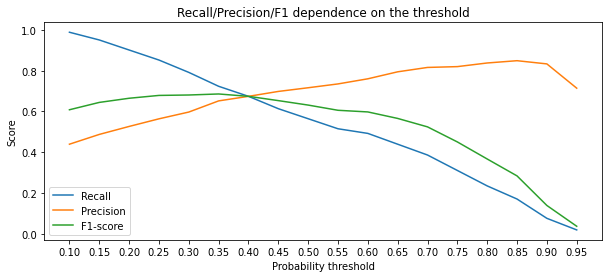

In [11]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

**Что мы видим на графике?**

С увеличением вероятностного порога повышается precision и падает recall. Очевидно, что с увеличением порога вероятности мы начинаем классифицировать как диабетиков только тех пациентов, в диагнозе которых мы хорошо уверены, то есть мы повышаем точность (precision), но при этом мы отсекаем пациентов, которые больны, но модель выдаёт низкую вероятность болезни, то есть мы уменьшаем охват (recall).

При этом значение F1-меры сначала немного повышается, а затем неуклонно падает.

Интересной является точка threshold=0.4, где происходит пересечение всех трёх графиков. Это точка равенства precision и recall и, как следует из формулы, равенства F1-меры.

Однако максимум F1-меры достигается в другой точке — threshold=0.35. При этом значения recall и precision в этой точке различны: recall выше, а вот precision ниже.

Перед нами стоит выбор, что для нас все таки важнее: precision, recall или их равенство. Давайте сделаем выбор в пользу равенства precision и recall, оно достигается при threshold=0.4.

***
Как теперь мы можем сделать предсказание класса, обладая данной информацией?

Мы делаем предсказание вероятности наличия диабета для всех пациентов, а затем вручную определяем всех пациентов, у которых эта вероятность > 0.4, в класс 1, а остальных — в класс 0. Далее считаем метрики:

In [12]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



Итак, мы смогли найти баланс между precision и recall, подобрав оптимальный порог вероятности.

Стоит отметить, что в DS-сообществе распространена практика подбора оптимального порога, так как он зависит от конкретных задач и значение 0.5 далеко не всегда является истинным.

In [15]:
# У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

# Вычислите значение метрики precision.
print('Precision: {:.2f}'.format(metrics.precision_score([0, 0, 1, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 1, 0, 1])))

# Вычислите значение метрики recall.
print('Recall: {:.2f}'.format(metrics.recall_score([0, 0, 1, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 1, 0, 1])))

# Вычислите значение метрики F1.

print('F1: {:.2f}'.format(metrics.f1_score([0, 0, 1, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 1, 0, 1])))

Precision: 0.75
Recall: 0.60
F1: 0.67


***
## **МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ**

✍ Ранее мы с вами рассмотрели основы бинарной классификации. Но что делать, когда классов, на которые необходимо разделить данные, больше 2? Например, классификация автомобилей по различным маркам или определение национальности по фотографии и т. д.

В таком случае используется очень простой подход, который называется **«один против всех» (one-vs-over)**.

Идея этого подхода очень простая. Если у нас есть ***k*** различных классов (**k>2**), давайте обучим ***k*** классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/dc46a1c672d14a249a2e15fa64e480b2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_9.png)

Если мы используем в качестве классификатора логистическую регрессию и количество факторов равно двум (x1 и x2), то можно изобразить тепловую карту вероятностей принадлежности к каждому из классов в каждой точке пространства, а также разделяющие плоскости, которые образуются при пороге вероятности в 0.5. 

![](https://lms.skillfactory.ru/assets/courseware/v1/f5cd06961e15e69623e981930d396ef1/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_10.png)

На тепловых картах каждый класс обозначен своим цветом: 0 — зелёным, 1 — жёлтым, 2 — синим. Чем ярче цвет, тем выше вероятность принадлежности к каждому к классу в этой области пространства.

В результате у нас получится три различных пространства вероятностей, что-то вроде трёх параллельных реальностей. Чтобы собрать всё это воедино, мы выбираем в каждой точке пространства максимум из вероятностей. Получим следующую картину:

![](https://lms.skillfactory.ru/assets/courseware/v1/d8cd72dcd4419c4c14224a829192955c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_11.png)

Модель логистической регрессии легко обобщается на случай мультиклассовой классификации. Пусть мы построили несколько разделяющих плоскостей с различными наборами параметров ***k***, где ***k*** — номер классификатора. То есть имеем **K** разделяющих плоскостей:

![](data/f38.PNG)

Чтобы преобразовать результат каждой из построенных моделей в вероятности в логистической регрессии, используется функция ***softmax*** — многомерный аналог сигмоиды:

![](data/f39.PNG)

Данная функция выдаёт нормированные вероятности, то есть в сумме для всех классов вероятность будет равна 1.

***
## **МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ НА PYTHON**

Давайте посмотрим, как логистическая регрессия решает задачу мультиклассовой классификации. 

In [16]:
# Возьмём датасет о пингвинах из библиотеки seaborn:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Описание данных:**

* species — класс пингвина ('Adelie', 'Chinstrap', 'Gentoo'), целевой признак;
* island — остров, на котором живёт пингвин ('Torgersen', 'Biscoe', 'Dream');
* bill_length_mm — длина клюва в миллиметрах;
* bill_depth_mm — толщина клюва в миллиметрах;
* flipper_length_mm — длина крыльев;
* body_mass_g — масса;
* sex — пол ('Male', 'Female').

**Наша цель — предсказать класс пингвина.**

Очевидно, что классификация является мультиклассовой, так как возможных значений **три**.

Для начала давайте посмотрим на пропуски в данных:

In [17]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Итак, в некоторых столбцах есть пропуски.

Логистическая регрессия — модель, которая не умеет работать с пропусками. Чтобы не получить ошибку, необходимо произвести предварительную предобработку. Для простоты давайте удалим все строки, содержащие пропуски в данных:

In [18]:
penguins_data = penguins_data.dropna()

In [19]:
# Теперь, когда пропусков в данных больше нет,
# разделим набор данных на матрицу наблюдений X и столбец с ответами y.

X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


Данные содержат строковые категориальные столбцы — island и sex. **Логистическая регрессия не умеет работать со строковыми значениями.** Необходимо произвести кодирование категориальных признаков. 

***Примечание. Кодировать целевую переменную y не нужно, даже если она представлена в виде строковых значений. Это не влияет на работу модели.***

In [20]:
# Воспользуемся функцией get_dummies() из библиотеки pandas для произведения «горячего» кодирования.
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


Теперь данные готовы для подачи в модель.

Создаём модель логистической регрессии, значение параметра **multi_class** выставляем на *'multinomial'* (мультиклассовая классификация), **max_iter** — на 1000 (для обеспечения сходимости), **random_state**=42.

Затем обучим модель с помощью метода **fit()** и сделаем предсказание вероятностей принадлежности к каждому из классов с помощью метода **predict_proba()** и самих классов — с помощью метода **predict()**. Вероятности округлим до второго знака после запятой.

In [21]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
 
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

Для наглядности создадим таблицу из вероятностей для каждого класса и финального предсказания. Выберем пять случайных строк из этой таблицы с помощью метода [**sample()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html):

In [22]:
#Создаём DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаём DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.79,0.21,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


Из таблицы можно проследить, как происходит предсказание класса пингвина на основе полученных вероятностей. Видно, что **выбирается класс, вероятность принадлежности к которому максимальна**.

Например, для строки под номером 7 логистическая регрессия предсказала три вероятности: 0.79 — вероятность принадлежности к классу Adelie, 0.21 — к классу Chinstrap и 0 — к классу Gentoo. На основе этих вероятностей было сделано предсказание и модель отнесла пингвина в строке 7 к классу Adelie.

Вот так и происходит мультиклассовая классификация. 

Давайте посмотрим, как в таком случае будет выглядеть отчёт о метриках:

In [23]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



Для мультиклассовой классификации к отчёту просто добавляется новая строка, соответствующая третьему классу. 

Из отчёта видно, что наша модель **идеально решила задачу классификации (все метрики равны 1), то есть классы оказались линейно разделимыми**.

## **ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

Давайте обобщим всё вышесказанное и приведём достоинства и недостатки логистической регрессии.

![](data/f40.PNG)

В завершение изучения логистической регрессии можно добавить, что недостаток с линейной разделимостью классов можно побороть с помощью **введения полиномиальных признаков**, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры.

Однако мы знаем, что с этим трюком стоит быть аккуратным, так как **можно получить переобученную модель**. Поэтому в комбинации с полиномиальными признаками стоит подобрать **наилучший параметр регуляризации**.

![](https://lms.skillfactory.ru/assets/courseware/v1/0ef73dfeeb026fbfb18138037c64e77f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-3_18.png)

На рисунке выше изображены три различные модели:

* первая — простая логистическая регрессия;
* вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени;
* третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени.

Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.